In [9]:
import deeplabcut

config_path = "/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/dlc_project/config.yaml"

Loading DLC 3.0.0rc8...


In [11]:
deeplabcut.extract_frames(
    config_path, 
    mode = "automatic",
    algo = 'kmeans')

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05/videos/full.mp4 ?
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 77.67  seconds.
Extracting and downsampling... 2330  frames from the video.


2330it [00:07, 293.34it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


[False]

In [13]:
import deeplabcut
deeplabcut.label_frames(config_path)

In [14]:
deeplabcut.check_labels(config_path, visualizeindividuals=True)

Creating images with labels by peter.


100%|██████████| 20/20 [00:01<00:00, 13.18it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [20]:
deeplabcut.create_training_dataset(
    config_path,
    net_type="resnet_50"
)

ValueError: Could not load the metadata file for ShuffleMetadata(name='2-dlc-pose-trackingJun5-trainset95shuffle1', train_fraction=0.95, index=1, engine=Engine.PYTORCH, split=None) as /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05/training-datasets/iteration-0/UnaugmentedDataSet_2-dlc-pose-trackingJun5/Documentation_data-2-dlc-pose-tracking_95shuffle1.pickle does not exist. If you deleted the shuffle, you also need to delete the shuffle from metadata.yaml or recreate the metadata.yaml file.

In [21]:
deeplabcut.train_network(
    config_path,
    shuffle=2)

Training with configuration:
data:
  bbox_margin: 20
  colormode: RGB
  inference:
    normalize_images: True
  train:
    affine:
      p: 0.5


      rotation: 30
      scaling: [0.5, 1.25]
      translation: 0
    crop_sampling:
      width: 448
      height: 448
      max_shift: 0.1
      method: hybrid
    gaussian_noise: 12.75
    motion_blur: True
    normalize_images: True
device: auto
metadata:
  project_path: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05
  pose_config_path: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05/dlc-models-pytorch/iteration-0/2-dlc-pose-trackingJun5-trainset80shuffle2/train/pytorch_config.yaml
  bodyparts: ['nose', 'left_ear', 'right_ear', 'head', 'mid_body', 'left_leg', 'right_leg', 'tail_base', 'tail_mid', 'tail_tip']
  unique_bodyparts: []
  individuals: ['animal']
  with_identity: None
method: bu
model:
  backbone:
    type: ResNet
    model_name: resnet50_gn
    output_stride: 16
    freeze_bn_stats: False
    freeze_bn_weights: False
  backbone_output_channels: 2048
  heads:
    bodypart:
    

In [23]:
deeplabcut.evaluate_network(config_path, Shuffles=[2], plotting=True)

100%|██████████| 4/4 [00:00<00:00, 10.08it/s]


Evaluation results for DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070-results.csv (pcutoff: 0.5):
train rmse             5.14
train rmse_pcutoff     2.37
train mAP             92.76
train mAR             93.75
test rmse              9.29
test rmse_pcutoff      7.26
test mAP              87.62
test mAR              87.50
Name: (0.8, 2, 70, -1, 0.5), dtype: float64


In [47]:
#Analyze new video
video_path = "/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/dlc_project/test_video/full_test.mp4"

deeplabcut.analyze_videos(
    config_path, [video_path],
    shuffle = 2,
    save_as_csv=True
)

Analyzing videos with /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05/dlc-models-pytorch/iteration-0/2-dlc-pose-trackingJun5-trainset80shuffle2/train/snapshot-best-070.pt
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/full_test.mp4
Video metadata: 
  Overall # of frames:    583
  Duration of video [s]:  19.43
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 583/583 [00:41<00:00, 13.96it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/full_testDLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/full_testDLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
The videos are analyzed. Now your research can truly start!
You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.



'DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070'

In [28]:
deeplabcut.plot_trajectories(config_path, [video_path], shuffle = 2)

Loading  data2/full.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


In [4]:
import deeplabcut

config_path = "/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/dlc_project/config.yaml"
video_path = "/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/full_train.mp4"

deeplabcut.create_labeled_video(
    config_path,
    [video_path],
    videotype=".mp4",
    shuffle = 2,
    filtered=False
)

Starting to process video: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/full_train.mp4
Loading /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/full_train.mp4 and data.


ValueError: min() arg is an empty sequence

### Filter Predictions

In [33]:
#filter pose data
deeplabcut.filterpredictions(
    config_path,
    [video_path],
    shuffle = 2,
    filtertype="median"
)

Filtering with median model /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/full.mp4
Saving filtered csv poses!


In [35]:
deeplabcut.create_labeled_video(
    config_path,
    [video_path],
    videotype=".mp4",
    shuffle = 2,
    filtered=True
)

Starting to process video: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/full.mp4
Loading /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/full.mp4 and data.


ValueError: min() arg is an empty sequence

### Analyze train and test videos for AR-HMM

In [39]:
#Analyze new video

deeplabcut.analyze_videos(
    config_path, [f"/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_{i}.mp4" for i in range(1,7)],
    shuffle = 2,
    save_as_csv=True
)

Analyzing videos with /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05/dlc-models-pytorch/iteration-0/2-dlc-pose-trackingJun5-trainset80shuffle2/train/snapshot-best-070.pt
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_1.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:29<00:00, 10.05it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_1DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_1DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_2.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:23<00:00, 12.50it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_2DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_2DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_3.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:23<00:00, 12.20it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_3DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_3DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_4.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:24<00:00, 12.09it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_4DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_4DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_5.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:23<00:00, 12.18it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_5DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_5DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_6.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:24<00:00, 11.94it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_6DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/video_6DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
The videos are analyzed. Now your research can truly start!
You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.



'DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070'

In [40]:
#Analyze new video

deeplabcut.analyze_videos(
    config_path, [f"/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_{i}.mp4" for i in range(7,9)],
    save_as_csv=True,
    shuffle = 2
)

Analyzing videos with /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/2-dlc-pose-tracking-peter-2025-06-05/dlc-models-pytorch/iteration-0/2-dlc-pose-trackingJun5-trainset80shuffle2/train/snapshot-best-070.pt
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_7.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:24<00:00, 11.78it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_7DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_7DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
Starting to analyze /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_8.mp4
Video metadata: 
  Overall # of frames:    292
  Duration of video [s]:  9.73
  fps:                    30.0
  resolution:             w=640, h=480

Running pose prediction with batch size 8


100%|██████████| 292/292 [00:24<00:00, 12.09it/s]


Saving results in /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_8DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070.h5 and /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/video_8DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070_full.pickle
The videos are analyzed. Now your research can truly start!
You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.



'DLC_Resnet50_2-dlc-pose-trackingJun5shuffle2_snapshot_070'

In [21]:
#Check Pose tracking inference on mouse07

video_path = '/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data/train_video/mouse07_1.mp4'

deeplabcut.create_labeled_video(
    config_path,
    [video_path],
    videotype=".mp4",
    filtered=False
)

Starting to process video: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data/train_video/mouse07_1.mp4
Loading /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data/train_video/mouse07_1.mp4 and data.
Duration of video [s]: 38.07, recorded with 30.0 fps!
Overall # of frames: 1142 with cropped frame dimensions: 310 320
Generating frames and creating video.


100%|██████████| 1142/1142 [00:00<00:00, 1446.49it/s]


[True]

In [48]:
#Check Pose tracking inference on mouse07

video_path = '/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/full_train.mp4'

deeplabcut.create_labeled_video(
    config_path,
    [video_path],
    shuffle=2,
    videotype=".mp4",
    filtered=False
)


Starting to process video: /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/full_train.mp4
Loading /Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/train_video/full_train.mp4 and data.


ValueError: min() arg is an empty sequence

In [ ]:
video_path = '/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/data2/test_video/full_test.mp4'

deeplabcut.create_labeled_video(
    config_path,
    [video_path],
    shuffle=2,
    videotype=".mp4",
    filtered=False
)

# Keypoint-Moseq

In [4]:
import keypoint_moseq as kpms
import matplotlib.pyplot as plt

project_dir = "keypoint_moseq"
config = lambda: kpms.load_config(project_dir)

In [6]:
dlc_config = "/Users/liuzehan/Desktop/STATS220 ML in Neuro/Project/main/dlc_project/config.yaml"
kpms.setup_project(project_dir, deeplabcut_config=dlc_config, overwrite=True)

In [12]:
kpms.update_config(
    project_dir,
    video_dir="dlc_project/videos/",
    anterior_bodyparts=["nose"],
    posterior_bodyparts=["tail_tip"],
    use_bodyparts=["tail_tip", "tail_mid", "tail_base", "left_leg", "right_leg", "mid_body", "right_ear", "left_ear", "nose", "head"],
    fps=30
)

In [13]:
# load data (e.g. from DeepLabCut)
keypoint_data_path = "data2/train_video/"  # can be a file, a directory, or a list of files
coordinates, confidences, bodyparts = kpms.load_keypoints(keypoint_data_path, "deeplabcut", extension=".csv")

# format data for modeling
data, metadata = kpms.format_data(coordinates, confidences, **config())

Loading keypoints: 100%|█████████████████| 1/1 [00:00<00:00, 140.33it/s]


Loading sample frames: 100%|██████████| 100/100 [00:01<00:00, 54.52it/s]


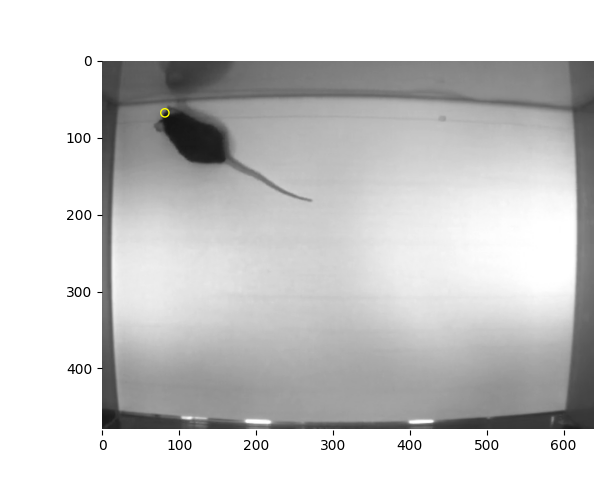

In [14]:
%matplotlib widget
kpms.noise_calibration(project_dir, coordinates, confidences, **config())

>=90.0% of variance exlained by 5 components.


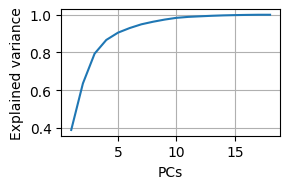

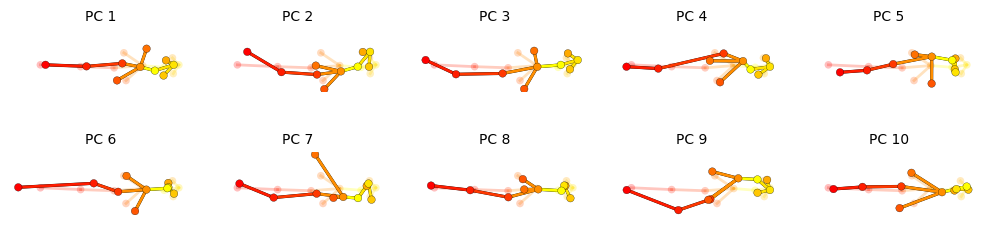

In [15]:
plt.close('all')
%matplotlib inline
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())

# use the following to load an already fit model
# pca = kpms.load_pca(project_dir)

In [16]:
kpms.update_config(project_dir, latent_dim=5)

In [17]:
# initialize the model
model = kpms.init_model(data, pca=pca, **config())

# optionally modify kappa
# model = kpms.update_hypparams(model, kappa=NUMBER)

Outputs will be saved to keypoint_moseq/2025_06_07-16_40_03


 47%|████████████████▍                  | 24/51 [00:04<00:02, 11.76it/s]

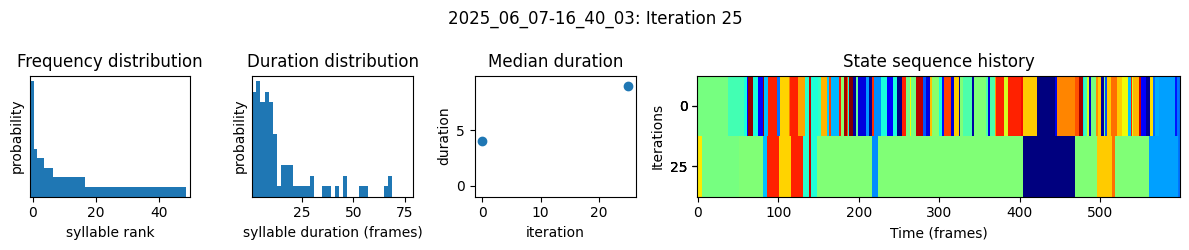

 98%|██████████████████████████████████▎| 50/51 [00:06<00:00, 11.11it/s]

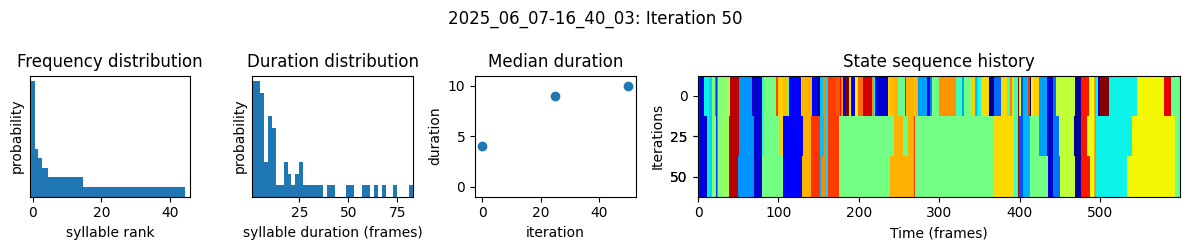

100%|███████████████████████████████████| 51/51 [00:07<00:00,  7.09it/s]


In [18]:
num_ar_iters = 50

model, model_name = kpms.fit_model(
    model, data, metadata, project_dir, ar_only=True, num_iters=num_ar_iters
)

Outputs will be saved to keypoint_moseq/2025_06_07-16_40_03


  5%|█▋                                | 25/501 [00:12<02:04,  3.82it/s]

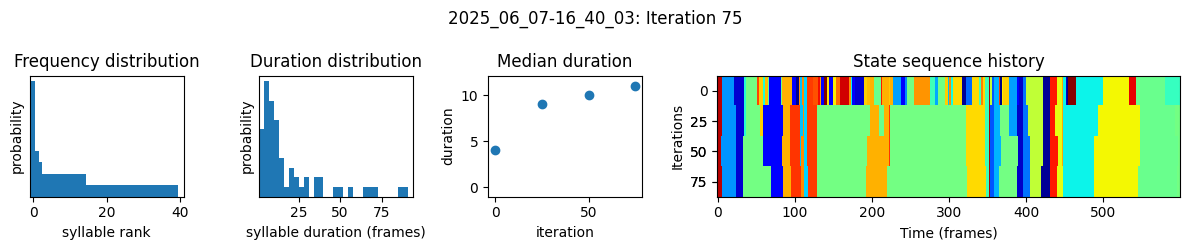

 10%|███▍                              | 50/501 [00:19<01:46,  4.24it/s]

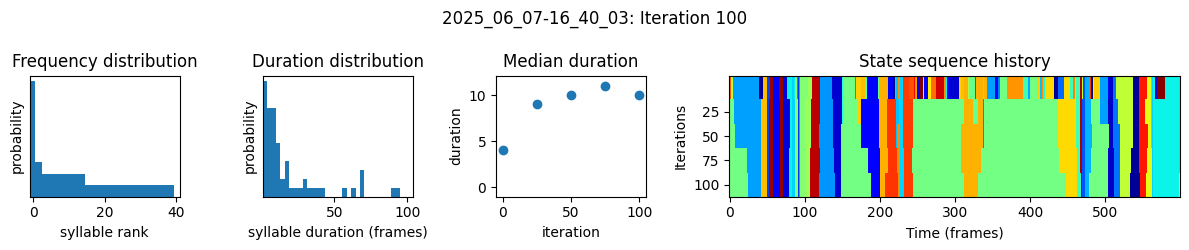

 15%|█████                             | 75/501 [00:25<01:35,  4.44it/s]

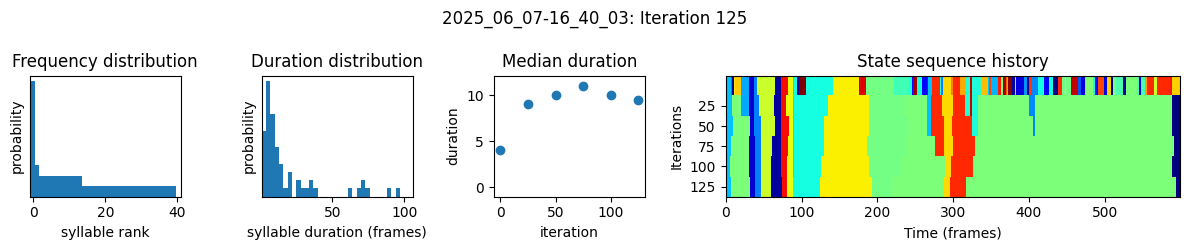

 20%|██████▌                          | 100/501 [00:31<01:25,  4.67it/s]

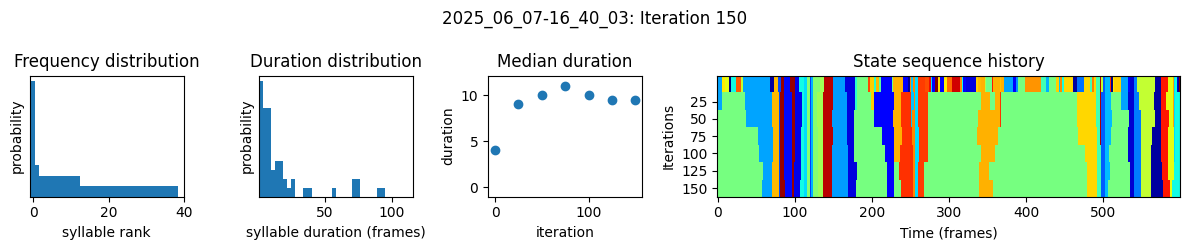

 25%|████████▏                        | 125/501 [00:37<01:24,  4.45it/s]

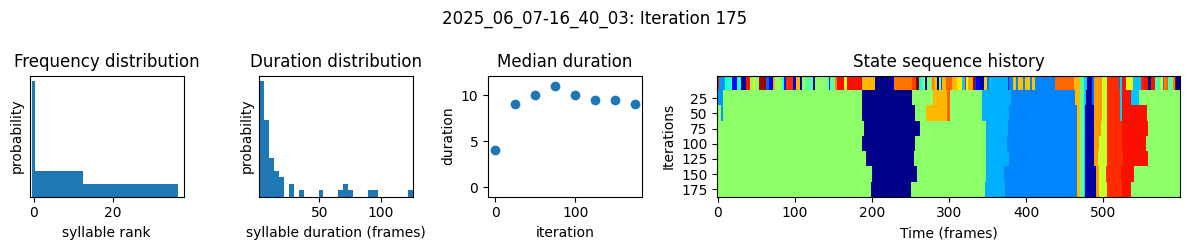

 30%|█████████▉                       | 150/501 [00:43<01:19,  4.41it/s]

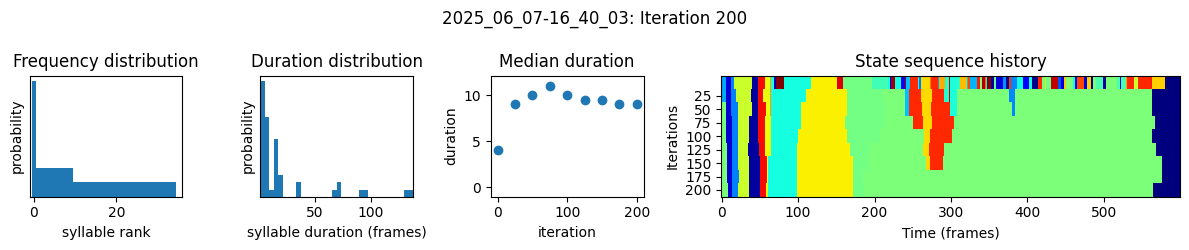

 35%|███████████▌                     | 175/501 [00:49<01:13,  4.42it/s]

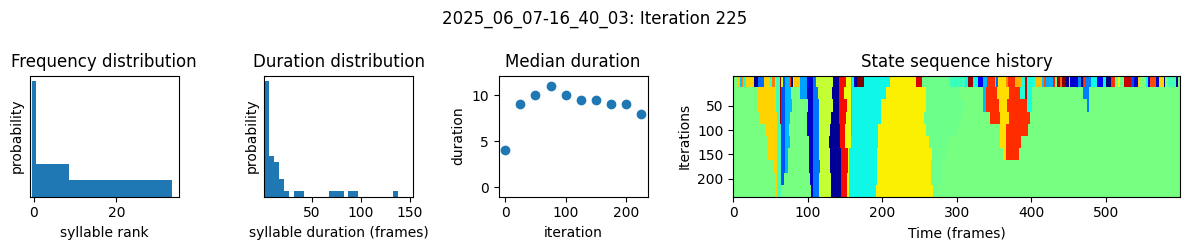

 40%|█████████████▏                   | 200/501 [00:55<01:09,  4.34it/s]

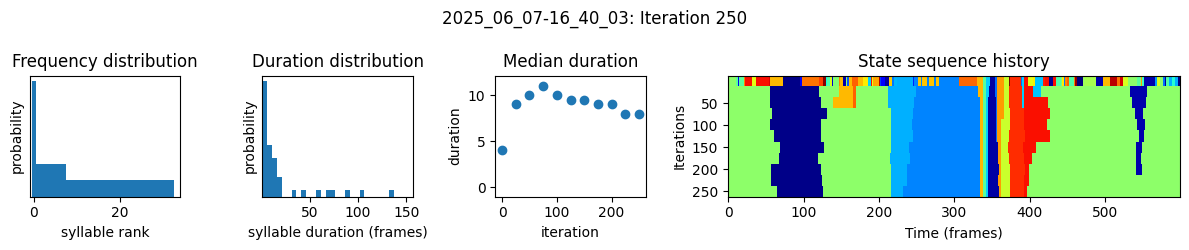

 45%|██████████████▊                  | 225/501 [01:01<01:01,  4.46it/s]

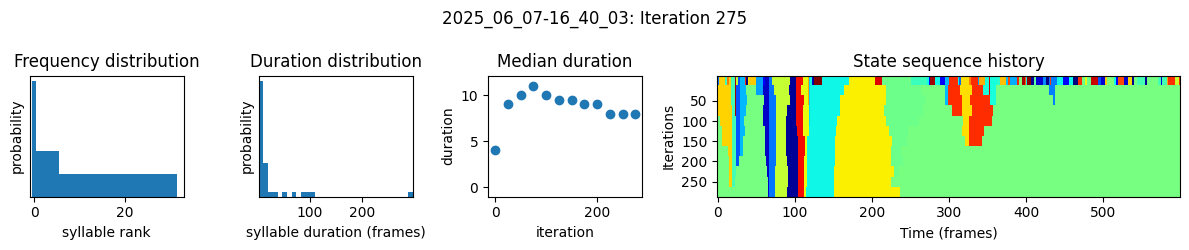

 50%|████████████████▍                | 250/501 [01:07<00:51,  4.85it/s]

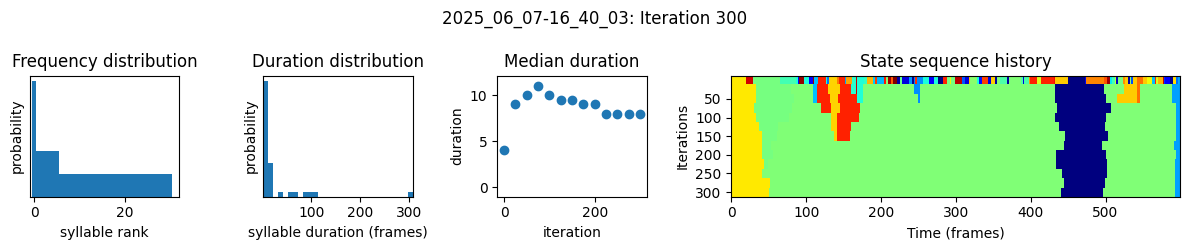

 55%|██████████████████               | 275/501 [01:14<01:04,  3.53it/s]

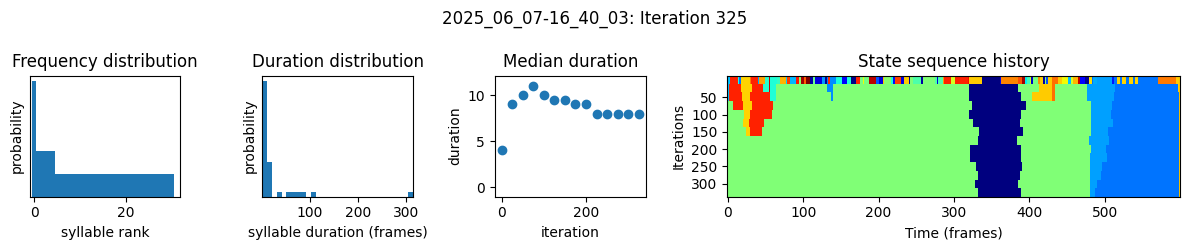

 60%|███████████████████▊             | 300/501 [01:21<00:44,  4.51it/s]

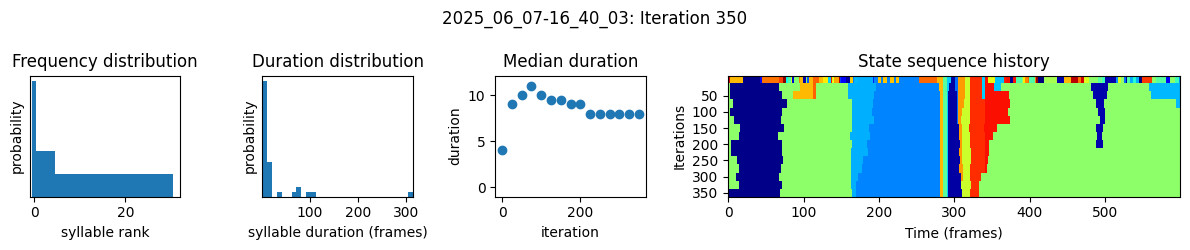

 65%|█████████████████████▍           | 325/501 [01:27<00:39,  4.51it/s]

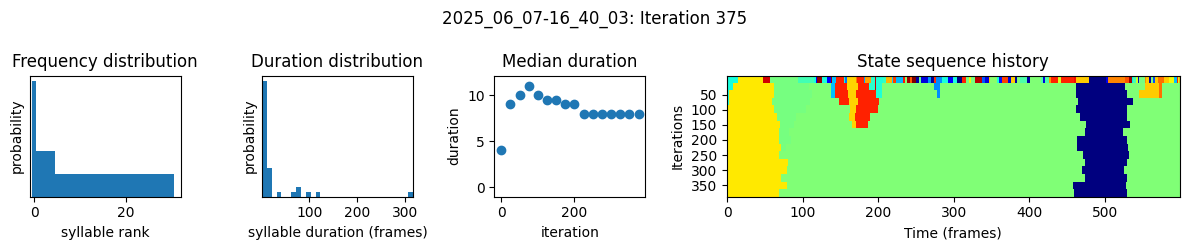

 70%|███████████████████████          | 350/501 [01:33<00:31,  4.78it/s]

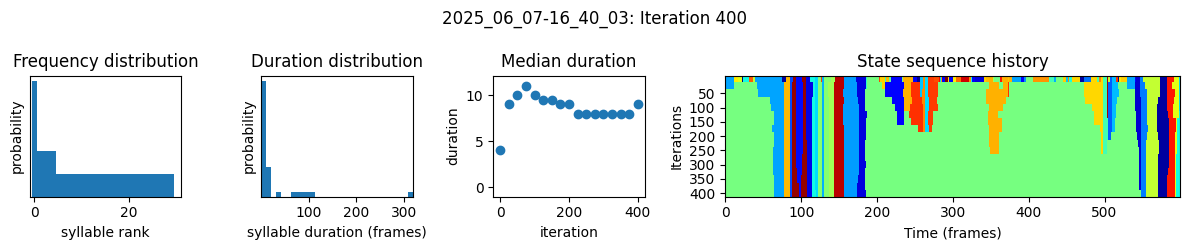

 75%|████████████████████████▋        | 375/501 [01:39<00:26,  4.68it/s]

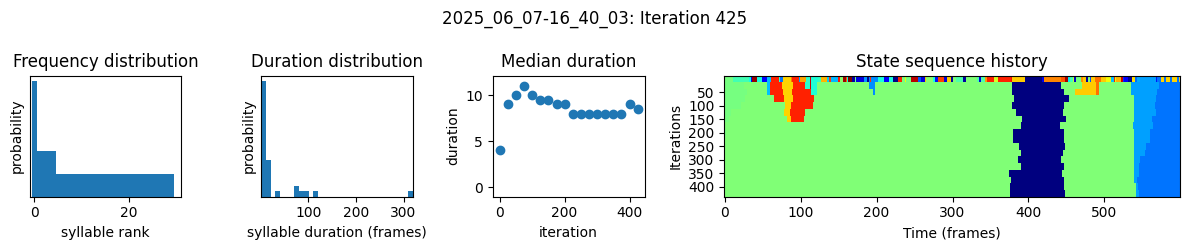

 80%|██████████████████████████▎      | 400/501 [01:45<00:22,  4.49it/s]

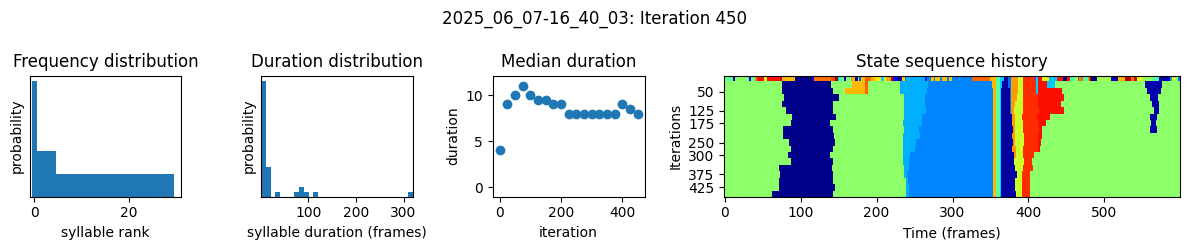

 85%|███████████████████████████▉     | 425/501 [01:51<00:17,  4.27it/s]

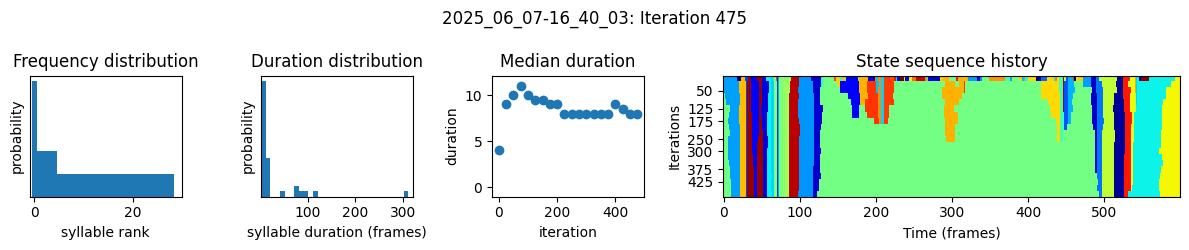

 90%|█████████████████████████████▋   | 450/501 [01:57<00:11,  4.31it/s]

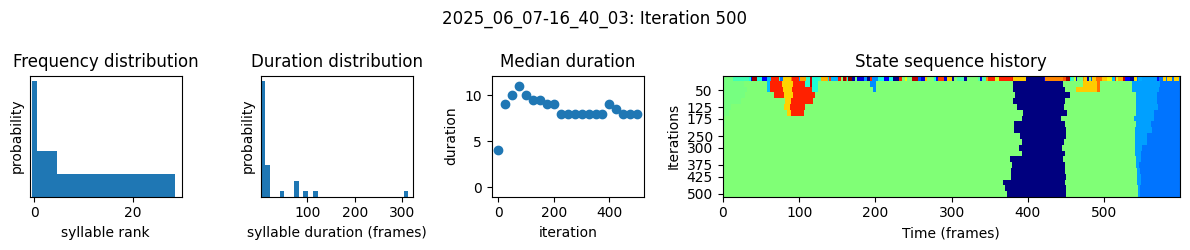

 95%|███████████████████████████████▎ | 475/501 [02:03<00:05,  4.59it/s]

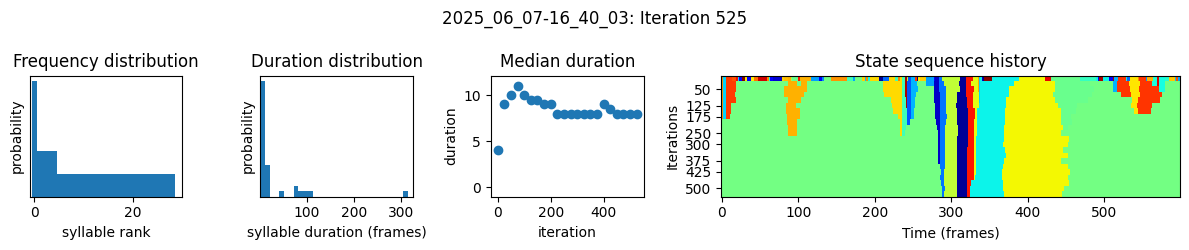

100%|████████████████████████████████▉| 500/501 [02:11<00:00,  4.26it/s]

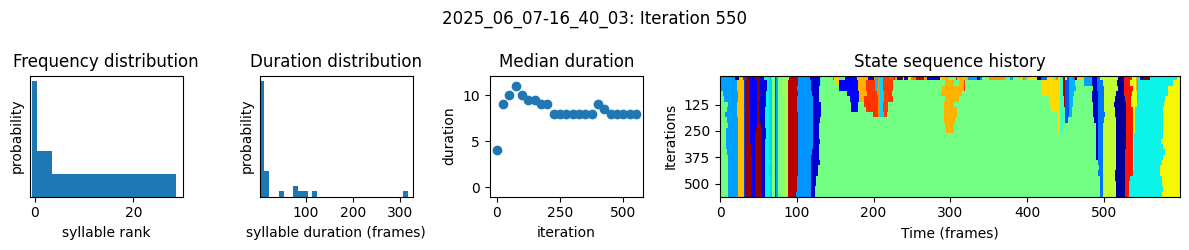

100%|█████████████████████████████████| 501/501 [02:11<00:00,  3.81it/s]


In [19]:
# load model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(
    project_dir, model_name, iteration=num_ar_iters
)

# modify kappa to maintain the desired syllable time-scale
model = kpms.update_hypparams(model, kappa=1e4)

# run fitting for an additional 500 iters
model = kpms.fit_model(
    model,
    data,
    metadata,
    project_dir,
    model_name,
    ar_only=False,
    start_iter=current_iter,
    num_iters=current_iter + 500,
)[0]

In [20]:
kpms.reindex_syllables_in_checkpoint(project_dir, model_name);

Reindexing: 100%|██████████| 23/23 [00:00<00:00, 103.62model snapshot/s]


In [21]:
# load the most recent model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(project_dir, model_name)

# extract results
results = kpms.extract_results(model, metadata, project_dir, model_name)

Saved results to keypoint_moseq/2025_06_07-16_40_03/results.h5


In [22]:
# optionally save results as csv
kpms.save_results_as_csv(results, project_dir, model_name)

Saving to csv: 100%|██████████████████████| 1/1 [00:00<00:00, 30.27it/s]


In [24]:
# load the most recent model checkpoint and pca object
model = kpms.load_checkpoint(project_dir, model_name)[0]

# load new data (e.g. from deeplabcut)
new_data = "data2/test_video/"  # can be a file, a directory, or a list of files
coordinates, confidences, bodyparts = kpms.load_keypoints(new_data, "deeplabcut", extension=".csv")
data, metadata = kpms.format_data(coordinates, confidences, **config())

# apply saved model to new data
results = kpms.apply_model(model, data, metadata, project_dir, model_name, **config())

# optionally rerun `save_results_as_csv` to export the new results
# kpms.save_results_as_csv(results, project_dir, model_name)

Loading keypoints:   0%|                          | 0/1 [00:00<?, ?it/s]

Applying model: 100%|█████████████████| 500/500 [00:45<00:00, 10.95it/s]

Saved results to keypoint_moseq/2025_06_07-16_40_03/results.h5


In [25]:
results = kpms.load_results(project_dir, model_name)
kpms.generate_trajectory_plots(coordinates, results, project_dir, model_name, **config())

Saving trajectory plots to keypoint_moseq/2025_06_07-16_40_03/trajectory_plots


ValueError: No syllables with sufficient instances to generate a trajectory. This
usually occurs when there is not enough inut data or when all frames
have the same syllable label (use `plot_syllable_frequencies` to check
if this is the case)

# Refine DLC

In [5]:
deeplabcut.refine_labels(config_path)

shibokensupport/signature/parser.py:269: RuntimeWarning: pyside_type_init:_resolve_value

        UNRECOGNIZED:   'PySide6.QtWidgets.QWidget'
        OFFENDING LINE: '1:PySide6.QtWidgets.QFileDialog(self,parent:PySide6.QtWidgets.QWidget,f:PySide6.QtCore.Qt.WindowFlags)'
        
shibokensupport/signature/parser.py:269: RuntimeWarning: pyside_type_init:_resolve_value

        UNRECOGNIZED:   'PySide6.QtCore.Qt.WindowFlags'
        OFFENDING LINE: '1:PySide6.QtWidgets.QFileDialog(self,parent:PySide6.QtWidgets.QWidget,f:PySide6.QtCore.Qt.WindowFlags)'
        
shibokensupport/signature/parser.py:269: RuntimeWarning: pyside_type_init:_resolve_value

        UNRECOGNIZED:   'PySide6.QtWidgets.QWidget'
        OFFENDING LINE: '0:PySide6.QtWidgets.QFileDialog(self,parent:PySide6.QtWidgets.QWidget=nullptr,caption:QString=QString(),directory:QString=QString(),filter:QString=QString())'
        
shibokensupport/signature/parser.py:269: RuntimeWarning: pyside_type_init:_resolve_value

        UNR